## Лабораторная работа по курсу \"Искусственный интеллект\"
## Многослойный персептрон
###  Собственная реализация

| Студент | Анисимов Валерий |
|---------|--------|
| Группа  | М8О-408Б-18      |

## Настройка среды

Устанавливаем все необходимый библиотеки: pandas, numpy, os, pickle

In [1]:
%pip install pandas
import pickle
import os
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


## Подготовка датасетов
Объявим некоторые функции для анализа датасетов

In [2]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### MNIST

Чёрно-белые картинки с цифрами. 

In [3]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)
print(MNIST.keys())

dict_keys(['Train'])


In [4]:
print(MNIST['Train'].keys())

dict_keys(['Labels', 'Features'])


Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



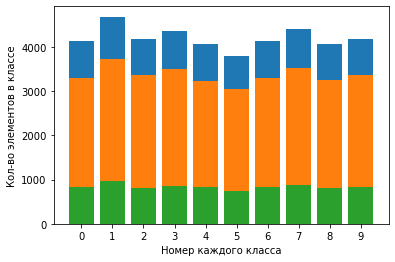

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

Основные параметры датасета:

In [6]:
print("Размер обучающей выборки : {}".format(len(mnist_train_x)))
print("Размер тестовой выборки  : {}".format(len(mnist_test_x)))
print("Размер датасета MNIST    : {}".format(len(features)))

Размер обучающей выборки : 33600
Размер тестовой выборки  : 8400
Размер датасета MNIST    : 42000


### FashionMNIST

In [8]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y = mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\Users\anisi\Desktop\fashion-mnist\utils
C:\Users\anisi\Desktop\fashion-mnist
C:\Users\anisi\Desktop


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



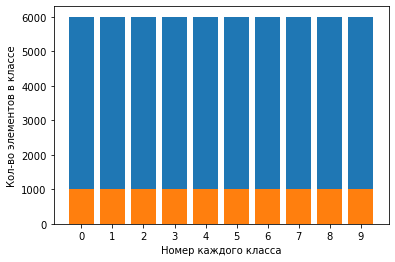

In [9]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

Переведём значения картинок из (0..255) в числа с плавающей точкой от 0 до 1.

In [10]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

In [11]:
print(fashion_mnist_train_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627452 

In [35]:
print("Размер Fashion MNIST : {}".format(len(fashion_mnist_test_x) + len(fashion_mnist_train_x)))

Размер Fashion MNIST : 70000


## Нейронная сеть (Перцептрон)

### Основные компоненты сети

Так как нейронную сеть можно представить в виде последовательности объектов, которые осуществляют взаимодействие межу собой, сформируем нейросеть из объектов с методами forward и backward. Forward используются для получения результатов от нейросети, т.е. прямой прогонка, а backward - для осуществления обратного прохода, который будет использоваться для обучения сети.

Базовую нейросеть можно представить в виде последовательности классов, приведенных ниже

In [13]:
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
    def copy(self):
        return Tanh()

Реализуем простую обертку над этимb классами, при помощи которой можно будет реализовать многослойный перцептрон, задав всего несколько параметров. Данный класс будет иметь зависимости от класса Net, а саму сеть можно представить следующим образом:

\[Слой нейросети\] <-> \[Функция активации\] <->  ... <-> \[Функция активации\] <-> \[SoftMax\] <-> \[Функция ошибки\] 

### Класс Perceptron

Класс Perceptron имеет множество необязательных аргументов, которые могут быть отрегулированы программистом (Программист может использовать собственные реализации функции активации, функции потерь и функции softmax). Кроме того программист может передать базовый Python список, в котором будут находится широты внутренних слоев нейросети. Таким образом при помощи одного списка задается кол-во скрытых слоев и их конфигурация.

Процесс обучения вынесен в отдельную функцию fit, кроме того пользователь может просто предоставить данные нейросети и сам класс вычислит количество входных и выходных нейронов.

Таким образом, чтобы создаь нейроосеть при помощи фреймворка достаточно задать широты внутренних нейронов и передать данные для обучения нейросети.

In [14]:
class Perceptron:
    def __init__(self, learning_rate=0.1,epochs=10, soft=Softmax(),act_func=Tanh(),
                layers=[5], loss_func=CrossEntropyLoss(),show_status=False):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.softmax=soft
        self.act_func=act_func
        self.layers=layers
        self.loss_function=loss_func
        self.show_status=show_status
        self.level=0
     
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
    def create_net(self, X, Y):
        self.net = Net()
        #узнаем ширину слоев нейросети
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
            
        #конфигурация нейросети слоями
        for i in range(len(layers_settings)-2):
            self.net.add(Linear(layers_settings[i], layers_settings[i+1]))
            self.net.add(self.act_func.copy())
        #добавляем выходной слой и softmax
        self.net.add(Linear(layers_settings[-2], layers_settings[-1]))
        self.net.add(self.softmax)
        return self    
    
    # надо как-то обучить перцептрон
    def fit(self, X,Y):
        #создадим нейросеть
        self.create_net(X,Y)
        #процесс обучения сети
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
            
        for epoch in range(1, self.epochs + 1):
            
            
            self.train_epoch(X, Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] потеря : {}, точность : {}".format(epoch, self.epochs, *(self.score(X,Y))))
        return self

    def train_epoch(self, train_x, train_y, batch_size=4):
        net = self.net
        loss = self.loss_function
        lr = self.learning_rate
        for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_y[i:i+batch_size]

            p = net.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = net.backward(dp)
            net.update(lr)  

    #вычисление вроятнсотей принадлжения каждому возможному классу
    def predict_prob(self, X):
        return self.net.forward(X)
    
    #выдаем наиболее вероятный класс (его номер)
    def predict(self, X):
        return np.argmax(self.predict_prob(X))
    
    def score(self, X,Y, calculate_confusion_matrix=False):
        p = self.net.forward(X)
        l = self.loss_function.forward(p,Y)
        pred = np.argmax(p,axis=1)
        acc = (pred==Y).mean()
        confusion_matrix=[]
        if calculate_confusion_matrix:
            confusion_matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
            for prd, act in zip (pred, Y):
                confusion_matrix[prd][act] += 1
        return l,acc, confusion_matrix

## Тестирование

### Теститрование на датасете MNIST
Конфигурировать сети будем внутренними слоями с различными широтами.

#### Однослойный перцептрон #### 

In [15]:
null_layered_perceptron = Perceptron(show_status=True, layers=[]).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.33053975759450305, точность : 0.9050297619047619
  [Эпоха 2 из 10] потеря : 0.30882106501975, точность : 0.9117261904761905
  [Эпоха 3 из 10] потеря : 0.29709371043805577, точность : 0.9154761904761904
  [Эпоха 4 из 10] потеря : 0.2891825933770763, точность : 0.917797619047619
  [Эпоха 5 из 10] потеря : 0.2835023168359094, точность : 0.9195833333333333
  [Эпоха 6 из 10] потеря : 0.279239719809116, точность : 0.9210119047619048
  [Эпоха 7 из 10] потеря : 0.2759301830376376, точность : 0.9220833333333334
  [Эпоха 8 из 10] потеря : 0.273296544560158, точность : 0.9225
  [Эпоха 9 из 10] потеря : 0.2711621535212845, точность : 0.9228273809523809
  [Эпоха 10 из 10] потеря : 0.26940642941982307, точность : 0.9233630952380952


In [16]:
print("Точность сети : {}".format(null_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.8947619047619048


#### Двуслойные перцептроны #### 
5 нейронов на скрытом слое

In [17]:
first_one_layered_perceptron = Perceptron(show_status=True).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [5]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.5536418879429642, точность : 0.8361904761904762
  [Эпоха 2 из 10] потеря : 0.5317402060314073, точность : 0.8429166666666666
  [Эпоха 3 из 10] потеря : 0.5209509936426062, точность : 0.855625
  [Эпоха 4 из 10] потеря : 0.5594904798935417, точность : 0.8317857142857142
  [Эпоха 5 из 10] потеря : 0.5208087862891997, точность : 0.8496130952380953
  [Эпоха 6 из 10] потеря : 0.5238404785547073, точность : 0.8520535714285714
  [Эпоха 7 из 10] потеря : 0.49292073907362943, точность : 0.8634226190476191
  [Эпоха 8 из 10] потеря : 0.4941517226129501, точность : 0.8635416666666667
  [Эпоха 9 из 10] потеря : 0.4976923473346108, точность : 0.8599404761904762
  [Эпоха 10 из 10] потеря : 0.490791322735066, точность : 0.8675297619047619


In [18]:
print("Точность сети : {}".format(first_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.8482142857142857


10 нейронов на скрытом слое

In [19]:
second_one_layered_perceptron = Perceptron(show_status=True, layers=[10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.35055620876926086, точность : 0.9002083333333334
  [Эпоха 2 из 10] потеря : 0.30919615026466896, точность : 0.9108630952380953
  [Эпоха 3 из 10] потеря : 0.31624318826309367, точность : 0.9083333333333333
  [Эпоха 4 из 10] потеря : 0.2965335915657611, точность : 0.9142857142857143
  [Эпоха 5 из 10] потеря : 0.29779500835461514, точность : 0.9157738095238095
  [Эпоха 6 из 10] потеря : 0.29315487343567204, точность : 0.9131845238095239
  [Эпоха 7 из 10] потеря : 0.29488904808753813, точность : 0.912797619047619
  [Эпоха 8 из 10] потеря : 0.30823090654520147, точность : 0.9080059523809524
  [Эпоха 9 из 10] потеря : 0.2733863043910662, точность : 0.9210714285714285
  [Эпоха 10 из 10] потеря : 0.2928764140867927, точность : 0.9139583333333333
Точность сети : 0.8940476190476191


25 нейронов на скрытом слое

In [20]:
third_one_layered_perceptron = Perceptron(show_status=True, layers=[25]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [25]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.22149741312862686, точность : 0.9345238095238095
  [Эпоха 2 из 10] потеря : 0.17240013976072774, точность : 0.9484821428571428
  [Эпоха 3 из 10] потеря : 0.16715331655507293, точность : 0.9504464285714286
  [Эпоха 4 из 10] потеря : 0.1507150535390414, точность : 0.9530059523809524
  [Эпоха 5 из 10] потеря : 0.1480726131591197, точность : 0.9528571428571428
  [Эпоха 6 из 10] потеря : 0.1291978401266499, точность : 0.9601785714285714
  [Эпоха 7 из 10] потеря : 0.11807429239304536, точность : 0.9641071428571428
  [Эпоха 8 из 10] потеря : 0.11948610534020176, точность : 0.9616071428571429
  [Эпоха 9 из 10] потеря : 0.10748972224816553, точность : 0.9667559523809524
  [Эпоха 10 из 10] потеря : 0.12596922872439675, точность : 0.9607142857142857
Точность сети : 0.9335714285714286


100 нейронов на скрытом слое

In [21]:
fourth_one_layered_perceptron = Perceptron(show_status=True, layers=[100]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.15275182548974328, точность : 0.95375
  [Эпоха 2 из 10] потеря : 0.11783021648809044, точность : 0.9642559523809524
  [Эпоха 3 из 10] потеря : 0.09916790939344206, точность : 0.9699702380952381
  [Эпоха 4 из 10] потеря : 0.08694203907683841, точность : 0.9720535714285714
  [Эпоха 5 из 10] потеря : 0.05904166061645578, точность : 0.980922619047619
  [Эпоха 6 из 10] потеря : 0.061146597276668616, точность : 0.9803273809523809
  [Эпоха 7 из 10] потеря : 0.04336692651217805, точность : 0.9860416666666667
  [Эпоха 8 из 10] потеря : 0.03385771668742001, точность : 0.9888095238095238
  [Эпоха 9 из 10] потеря : 0.034201365829924314, точность : 0.9882142857142857
  [Эпоха 10 из 10] потеря : 0.03616152326950785, точность : 0.987470238095238
Точность сети : 0.9607142857142857


#### Трехслойные перцептроны #### 

Внутренние слои шириной 5 и 15

In [36]:
first_double_layered_perceptron = Perceptron(show_status=True, layers=[5,15]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [5, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.5765001579072268, точность : 0.8436904761904762
  [Эпоха 2 из 10] потеря : 0.536342098693084, точность : 0.8475595238095238
  [Эпоха 3 из 10] потеря : 0.5502565366413961, точность : 0.8439285714285715
  [Эпоха 4 из 10] потеря : 0.5434999840147445, точность : 0.8532738095238095
  [Эпоха 5 из 10] потеря : 0.533081244628643, точность : 0.847202380952381
  [Эпоха 6 из 10] потеря : 0.5032766772368852, точность : 0.8638988095238095
  [Эпоха 7 из 10] потеря : 0.5390314111441344, точность : 0.8486607142857143
  [Эпоха 8 из 10] потеря : 0.492914819115096, точность : 0.8658333333333333
  [Эпоха 9 из 10] потеря : 0.5043749288301671, точность : 0.8644047619047619
  [Эпоха 10 из 10] потеря : 0.5058977199565055, точность : 0.861875
Точность сети : 0.8422619047619048


Внутренние слои шириной 6 и 10

In [37]:
second_double_layered_perceptron = Perceptron(show_status=True, layers=[6,10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [6, 10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.5141301738632451, точность : 0.862172619047619
  [Эпоха 2 из 10] потеря : 0.46712692276387413, точность : 0.8746726190476191
  [Эпоха 3 из 10] потеря : 0.45007043776356725, точность : 0.8834821428571429
  [Эпоха 4 из 10] потеря : 0.4654998600209543, точность : 0.877797619047619
  [Эпоха 5 из 10] потеря : 0.4329809353485295, точность : 0.8835416666666667
  [Эпоха 6 из 10] потеря : 0.4169730966839463, точность : 0.8897321428571429
  [Эпоха 7 из 10] потеря : 0.43859253188178493, точность : 0.8847321428571429
  [Эпоха 8 из 10] потеря : 0.4228660508627291, точность : 0.888125
  [Эпоха 9 из 10] потеря : 0.43910306570464624, точность : 0.8862202380952381
  [Эпоха 10 из 10] потеря : 0.4160062725970398, точность : 0.8928571428571429
Точность сети : 0.8703571428571428


Внутренние слои шириной 20 и 10

In [46]:
third_double_layered_perceptron = Perceptron(show_status=True, layers=[20,10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.2997669433652981, точность : 0.9166369047619047
  [Эпоха 2 из 10] потеря : 0.31069380302164606, точность : 0.9133928571428571
  [Эпоха 3 из 10] потеря : 0.2832720962618999, точность : 0.9183333333333333
  [Эпоха 4 из 10] потеря : 0.23131854143750943, точность : 0.9355654761904761
  [Эпоха 5 из 10] потеря : 0.23400884647369738, точность : 0.9319047619047619
  [Эпоха 6 из 10] потеря : 0.2284798875766043, точность : 0.9367559523809523
  [Эпоха 7 из 10] потеря : 0.2317672423425787, точность : 0.9358630952380952
  [Эпоха 8 из 10] потеря : 0.2080710827485593, точность : 0.9414285714285714
  [Эпоха 9 из 10] потеря : 0.21078607388239626, точность : 0.9372916666666666
  [Эпоха 10 из 10] потеря : 0.22524223417408962, точность : 0.9352678571428571
Точность сети : 0.9164285714285715


#### Другие многослойные перцептроны

Внутренние слои шириной 15, 6, 11

In [38]:
first_multi_layered_perceptron = Perceptron(show_status=True, layers=[15, 6, 11]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 3
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15, 6, 11]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.5192346855027137, точность : 0.8563392857142857
  [Эпоха 2 из 10] потеря : 0.4822588988870701, точность : 0.8659523809523809
  [Эпоха 3 из 10] потеря : 0.4497286990472003, точность : 0.8755952380952381
  [Эпоха 4 из 10] потеря : 0.48301337826086493, точность : 0.8625892857142857
  [Эпоха 5 из 10] потеря : 0.4030800286080829, точность : 0.8991666666666667
  [Эпоха 6 из 10] потеря : 0.4681412656167351, точность : 0.8709523809523809
  [Эпоха 7 из 10] потеря : 0.41762600552117574, точность : 0.8854761904761905
  [Эпоха 8 из 10] потеря : 0.40164399016611213, точность : 0.8947619047619048
  [Эпоха 9 из 10] потеря : 0.39396296609775505, точность : 0.8964880952380953
  [Эпоха 10 из 10] потеря : 0.4033292433877201, точность : 0.8991964285714286
Точность сети : 0.8841666666666667


Внутренние слои шириной 4, 5, 6, 7

In [39]:
second_multi_layered_perceptron = Perceptron(show_status=True, layers=[4, 5, 6, 7]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 4
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [4, 5, 6, 7]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.8036067038035867, точность : 0.7360714285714286
  [Эпоха 2 из 10] потеря : 0.8501551578081177, точность : 0.6955059523809524
  [Эпоха 3 из 10] потеря : 0.737945484439304, точность : 0.7524107142857143
  [Эпоха 4 из 10] потеря : 0.7275293928664062, точность : 0.7585119047619048
  [Эпоха 5 из 10] потеря : 0.7423525438925322, точность : 0.760327380952381
  [Эпоха 6 из 10] потеря : 0.7244744164738142, точность : 0.7594345238095238
  [Эпоха 7 из 10] потеря : 0.7276547328444094, точность : 0.7548511904761904
  [Эпоха 8 из 10] потеря : 0.7463955085826808, точность : 0.7511011904761905
  [Эпоха 9 из 10] потеря : 0.6871139350360026, точность : 0.7705059523809524
  [Эпоха 10 из 10] потеря : 0.7517610781720543, точность : 0.7277678571428572
Точность сети : 0.7086904761904762


Внутренние слои шириной 3, 4, 5, 6, 3, 5, 2, 2, 3

In [40]:
third_multi_layered_perceptron = Perceptron(show_status=True, layers=[3, 4, 5, 6, 3, 5, 2, 2, 3]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 9
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [3, 4, 5, 6, 3, 5, 2, 2, 3]
Обучение сети:
  [Эпоха 1 из 10] потеря : 2.2565975433254195, точность : 0.1331845238095238
  [Эпоха 2 из 10] потеря : 1.6757096478926883, точность : 0.304375
  [Эпоха 3 из 10] потеря : 2.0288485914376286, точность : 0.22273809523809524
  [Эпоха 4 из 10] потеря : 1.9911251111943455, точность : 0.23092261904761904
  [Эпоха 5 из 10] потеря : 1.9889399299583328, точность : 0.23214285714285715
  [Эпоха 6 из 10] потеря : 2.069259107240253, точность : 0.19592261904761904
  [Эпоха 7 из 10] потеря : 2.059841828150416, точность : 0.19815476190476192
  [Эпоха 8 из 10] потеря : 2.3105889088186147, точность : 0.10726190476190477
  [Эпоха 9 из 10] потеря : 2.117928599033838, точность : 0.18794642857142857
  [Эпоха 10 из 10] потеря : 2.30269015101555, точность : 0.11077380952380952
Точность сети : 0.10952380952380952


 Как видно из результатов тестирования подобранные гиперпараметры сети не подходят для решения данной задачи. 

### Тестирование на датасете FashionMnist
#### Однослойный перцептрон

In [28]:
fmnist_null_perceptron = Perceptron(show_status=True, layers=[]).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_null_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.9344653491515666, точность : 0.79545
  [Эпоха 2 из 10] потеря : 0.9139529899003904, точность : 0.8047666666666666
  [Эпоха 3 из 10] потеря : 0.8770387332640599, точность : 0.8118
  [Эпоха 4 из 10] потеря : 0.896120340196417, точность : 0.811
  [Эпоха 5 из 10] потеря : 0.8733941837543867, точность : 0.8142
  [Эпоха 6 из 10] потеря : 0.8205157655053785, точность : 0.8213333333333334
  [Эпоха 7 из 10] потеря : 0.7857984310796748, точность : 0.8266666666666667
  [Эпоха 8 из 10] потеря : 0.7598576314699094, точность : 0.83145
  [Эпоха 9 из 10] потеря : 0.7275315334148955, точность : 0.8367333333333333
  [Эпоха 10 из 10] потеря : 0.7476506266811564, точность : 0.8340166666666666
Точность сети : 0.8073


#### Двуслойный перцептрон

In [41]:
fmnist_first_perceptron = Perceptron(show_status=True, layers=[10], learning_rate=0.01).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_first_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.47501384736575003, точность : 0.8352
  [Эпоха 2 из 10] потеря : 0.43821768450826787, точность : 0.8459666666666666
  [Эпоха 3 из 10] потеря : 0.41564384665540954, точность : 0.8538666666666667
  [Эпоха 4 из 10] потеря : 0.3982055518696969, точность : 0.8602833333333333
  [Эпоха 5 из 10] потеря : 0.3857175022435897, точность : 0.8643666666666666
  [Эпоха 6 из 10] потеря : 0.37911591160922203, точность : 0.8671666666666666
  [Эпоха 7 из 10] потеря : 0.37459717444290574, точность : 0.86855
  [Эпоха 8 из 10] потеря : 0.3715209876294351, точность : 0.86975
  [Эпоха 9 из 10] потеря : 0.36902011312848987, точность : 0.8703166666666666
  [Эпоха 10 из 10] потеря : 0.3666722111006752, точность : 0.8709166666666667
Точность сети : 0.8495


#### Трехслойный перцептрон

In [30]:
fmnist_second_perceptron = Perceptron(show_status=True, layers=[10,15], learning_rate=0.001, epochs=20)
fmnist_second_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_second_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10, 15]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.7410984121668497, точность : 0.7633666666666666
  [Эпоха 2 из 20] потеря : 0.569979983596857, точность : 0.80475
  [Эпоха 3 из 20] потеря : 0.5044828862341432, точность : 0.8273166666666667
  [Эпоха 4 из 20] потеря : 0.47017117372739325, точность : 0.8385
  [Эпоха 5 из 20] потеря : 0.4487903599196954, точность : 0.84495
  [Эпоха 6 из 20] потеря : 0.4338375157634986, точность : 0.8499666666666666
  [Эпоха 7 из 20] потеря : 0.4225102179190197, точность : 0.8536
  [Эпоха 8 из 20] потеря : 0.4134133811739357, точность : 0.8559333333333333
  [Эпоха 9 из 20] потеря : 0.40579057765199716, точность : 0.8582
  [Эпоха 10 из 20] потеря : 0.39921136626289055, точность : 0.8602666666666666
  [Эпоха 11 из 20] потеря : 0.39341893808554335, точность : 0.8619833333333333
  [Эпоха 12 из 20] потеря

#### Четырехслойный перцептрон

In [42]:
fmnist_third_perceptron = Perceptron(show_status=True, layers=[15, 6, 12], learning_rate=0.001, epochs=20)
fmnist_third_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_third_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 3
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15, 6, 12]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.9750732344366266, точность : 0.7094833333333334
  [Эпоха 2 из 20] потеря : 0.6968382882324928, точность : 0.7768833333333334
  [Эпоха 3 из 20] потеря : 0.5834035544656401, точность : 0.8128
  [Эпоха 4 из 20] потеря : 0.5210208964629541, точность : 0.8317
  [Эпоха 5 из 20] потеря : 0.4806689749516209, точность : 0.8436
  [Эпоха 6 из 20] потеря : 0.4510274798629689, точность : 0.8521333333333333
  [Эпоха 7 из 20] потеря : 0.42893940629789856, точность : 0.8580833333333333
  [Эпоха 8 из 20] потеря : 0.41223964297006, точность : 0.8635
  [Эпоха 9 из 20] потеря : 0.3991460463068801, точность : 0.8668166666666667
  [Эпоха 10 из 20] потеря : 0.3885311184637417, точность : 0.8705
  [Эпоха 11 из 20] потеря : 0.3797749714052905, точность : 0.8730833333333333
  [Эпоха 12 из 20] потеря : 

### Итоги

Приведем таблицы со статистикой тестирования

|№ | Кол-во внутр-х слоев | Широты внутр-х слоев | Точность на тестовой выборке (%) | Кол-во эпох | Коэф. обучения | Датасет | 
|--|:--------------------:|:------------:|:--------------------------------:|:-----------:|:-----------:|:-----------:|
|1| 0 |  | 89.476 | 10 | 0.1 | MNIST |
|2| 1 | 5  | 84.821 | 10 | 0.1  | MNIST |
|3| 1 | 10 |89.405 | 10 | 0.1  | MNIST |
|4| 1 | 100 | 96.071 | 10 | 0.1  | MNIST |
|5| 2 | 5, 15 | 84.226 | 10 | 0.1  | MNIST |
|6| 2 | 6, 10 | 87.036 | 10 | 0.1  | MNIST |
|7| 2 | 20, 10 | 91.643 | 10 | 0.1  | MNIST |
|8| 3 | 15, 6, 11 | 88.417 | 10 | 0.1  | MNIST |
|9| 4 | 4, 5, 6, 7 | 70.869 | 10 | 0.1  | MNIST |
|10| 9 | 3, 4, 5, 6, 3, 5, 2, 2, 3 | 10.952 | 10 | 0.1 | MNIST |
|11| 0 |  | 80.73 | 10 | 0.1 | FashionMNIST |
|12| 1 | 10 | 84.95 | 10 | 0.01 | FashionMNIST |
|13| 2| 10, 15 | 85.09 | 20 | 0.001 | FashionMNIST |
|14| 3| 15, 6, 12 | 86.04 | 20 | 0.001 | FashionMNIST |


_Датасет_ : MNIST

* _Количество входных нейронов_ : 784
* _Количество классов для классификации_ : 10


_Датасет_ : FashionMNIST 

* _Количество входных нейронов_ : 784 
* _Количество классов для классификации_ : 10

Получим confusion matrix для наиболее удачных нейронных сетей.

In [47]:
fourth_one_layered_confusion_matrix = fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y,calculate_confusion_matrix=True)[2]
print(fourth_one_layered_confusion_matrix)

[[817   0  10   4   1   4  19   2   7   6]
 [  0 950   1   2   3   0   0   4   2   2]
 [  0   1 761   5   2   2   3   2   2   0]
 [  2   3  15 828   1  12   0   3  14  14]
 [  1   0   1   0 802   1   2   1   2  17]
 [  1   1   1   7   1 703   3   0   2   5]
 [  0   0   2   0   4   6 804   0   0   0]
 [  0   2  16   2   3   1   0 862   2  20]
 [  4   7   3  10   5  11   3   1 786   7]
 [  1   0   1   2  14   5   0   4   0 757]]


In [49]:
third_double_layered_perceptron_confusion_matrix = third_double_layered_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y,calculate_confusion_matrix=True)[2]
print(fmnist_third_perceptron_confusion_matrix)

[[ 34  74 334  18 446 154 245  17 273  38]
 [  1   1   0   1   0   3   0   0   0   0]
 [  0   1  22   1  20 333   5 374  86 787]
 [ 13   5  16   6  17  45  14   0   7  76]
 [  4   0   0   2   0 211   1 311  13   1]
 [ 49 193  15  86   8  89  17   5  48   0]
 [  6   1   1   5   1 126   1 284  58   7]
 [  1   0   0   1   1   5   1   6   4   0]
 [888 721 602 878 499  28 705   2 501  91]
 [  4   4  10   2   8   6  11   1  10   0]]


## Выводы

В ходе работы удалось реализовать собственный нейросетевой фреймворк, способный решать задачи классификации объектов. Для этого достаточно передать несколько параметров в нейросеть и воспользоваться обучающей выборкой. Нейросеть обучается методом обучения с учителем и регулирует веса, решая задачу минимизации функции ошибки при методом градиентного спуска. Тестирование нейросети проведено на датасетах MNIST и FashionMNIST нейросетями с различными конфигурациями. Получены результаты точности их работы на тестовой выборке, которые варьируются от 10 до 96%. Для наиболее удачных сетей были построены Confusion matrix.